
Created on Thu Dec  6 18:39:52 2018

This one is some preleminary stuff about 823 Project Data, specifically the 

@author: 9atg



In [16]:
#import standard packages
import os
import datetime
import random as rd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import other packages 
import re
from sklearn.metrics import log_loss
import seaborn as sns

In [17]:
# IMPORT FILES
#setup dir
inputdir = 'D:\QUEENS MMAI\823 Finance\Project\Input'
outputdir = 'D:\QUEENS MMAI\823 Finance\Project\Output'


## Read file(s) / directory management
os.chdir(inputdir)
train = pd.read_csv('numerai_training_data.csv')
test = pd.read_csv('numerai_tournament_data.csv')
os.chdir(outputdir)

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature46,feature47,feature48,feature49,feature50,target_bernie,target_charles,target_elizabeth,target_jordan,target_ken
0,nc27ed65ef67ce42,era1,train,0.62968,0.47129,0.34326,0.22883,0.38267,0.65741,0.45198,...,0.71490,0.40608,0.51415,0.48324,0.34669,0,1,0,1,0
1,naa5a84534c6ab21,era1,train,0.37251,0.37810,0.27941,0.74632,0.51044,0.37400,0.70854,...,0.50353,0.65797,0.76533,0.48823,0.46841,0,0,0,0,0
2,nbcc4ae7bbf8e459,era1,train,0.51107,0.51159,0.47409,0.34654,0.39853,0.37676,0.53596,...,0.58013,0.62680,0.47693,0.44905,0.56972,1,1,1,1,1
3,n96698749fc43501,era1,train,0.64932,0.52581,0.36714,0.20317,0.50647,0.72394,0.56266,...,0.64085,0.48136,0.55898,0.37294,0.60155,0,0,0,0,0
4,n70d9403b231c750,era1,train,0.35676,0.42657,0.40487,0.63140,0.43897,0.38657,0.52133,...,0.37567,0.60709,0.40897,0.41032,0.58685,1,1,1,1,1


 I fully expect this to be boring stuff, they don't want us wasting time changing the data, they might even have a rule against it or something  


## Lets talk about Numer.ai Scoring, and what it actually means! 

## 1. Logarithmic Loss based scoring  (must be <0.693)
       a- Validation Logloss: Graded against validation, publically displayed:  
       b- Test Logloss: This is a Hidden holdout set, it lets them know if they actually want to trust our model 
       c- Live Logloss: This is IF they use our stuff, it's determines our payout along with our submitted stake.
       

We seem to have all of them in the dataset, but can really only use a-
          
Score to benchmark ourselves against is Log loss <0.693: 
  

  
MATH ASIDE: 
0.693 is recognizable as ln(2), so i did a quick check to see what they are actually asking for... 

-{(y*ln(p) + (1 - y)*ln(1 - p))} is the formula for Log Loss (for binary catorization)

for simplicity in our case it can be reduced to 

= -ln(p)  
where p is probability that you are off by (it says 0 you say 0.45, p =0.45  )

Realistically speaking we just barely need to beat random chance ! 
'''

## 2. Consitency... Required to meet this benchmark in >58% of eras

In [18]:
# Eras, there are many of them , 120 to be exact 
eras = train.loc[:,'era']
print(len(eras.unique()))

120


## 3. You must actually use the same model for everything, 

In [19]:
# you can't just submit several overfitted models 
# that each do well at different eras/person

In [20]:
#THEREFORE....    
#My fully functional model that passes all 3 steps is as follows ...  

#                 0.5*np.ones(len(df),)


basically_a_model = 0.5*np.ones(len(train),)

y_true = train.loc[:,'target_bernie']
step1check = log_loss(y_true,basically_a_model)
print('log_loss-->', round(step1check,3))


log_loss--> 0.693


In [21]:
#applies to any and all eras >58% of the time
for i in eras.unique():
    index = eras==i
    y_true = train.loc[index,'target_bernie']
    basically_a_model = 0.5*np.ones(len(y_true),)
    print('for ',i,' log_loss-->',round(log_loss(y_true,basically_a_model),3))

for  era1  log_loss--> 0.693
for  era2  log_loss--> 0.693
for  era3  log_loss--> 0.693
for  era4  log_loss--> 0.693
for  era5  log_loss--> 0.693
for  era6  log_loss--> 0.693
for  era7  log_loss--> 0.693
for  era8  log_loss--> 0.693
for  era9  log_loss--> 0.693
for  era10  log_loss--> 0.693
for  era11  log_loss--> 0.693
for  era12  log_loss--> 0.693
for  era13  log_loss--> 0.693
for  era14  log_loss--> 0.693
for  era15  log_loss--> 0.693
for  era16  log_loss--> 0.693
for  era17  log_loss--> 0.693
for  era18  log_loss--> 0.693
for  era19  log_loss--> 0.693
for  era20  log_loss--> 0.693
for  era21  log_loss--> 0.693
for  era22  log_loss--> 0.693
for  era23  log_loss--> 0.693
for  era24  log_loss--> 0.693
for  era25  log_loss--> 0.693
for  era26  log_loss--> 0.693
for  era27  log_loss--> 0.693
for  era28  log_loss--> 0.693
for  era29  log_loss--> 0.693
for  era30  log_loss--> 0.693
for  era31  log_loss--> 0.693
for  era32  log_loss--> 0.693
for  era33  log_loss--> 0.693
for  era34  log_los

In [22]:
# and is ofc the same model each time. 
    

# Actual Data stuff

In [23]:
#Boring Dataset is boring
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature1,502732.0,0.464556,0.131996,0.00000,0.371850,0.463720,0.555810,0.99085
feature2,502732.0,0.455349,0.100119,0.00000,0.388450,0.454715,0.521620,0.90437
feature3,502732.0,0.481495,0.116514,0.00000,0.401670,0.479100,0.559240,0.97410
feature4,502732.0,0.443951,0.109570,0.00014,0.370500,0.443310,0.516250,0.97499
feature5,502732.0,0.509341,0.112263,0.00000,0.435150,0.512390,0.586410,0.99252
feature6,502732.0,0.487672,0.115142,0.00000,0.408290,0.486830,0.565500,0.99875
feature7,502732.0,0.527147,0.123103,0.01297,0.444280,0.529835,0.612662,1.00000
feature8,502732.0,0.558786,0.115907,0.01940,0.482040,0.562790,0.639700,0.99588
feature9,502732.0,0.522584,0.103687,0.02215,0.454780,0.525270,0.592780,1.00000
feature10,502732.0,0.467633,0.115763,0.00000,0.388060,0.463440,0.543260,0.99015


In [24]:
# 1 ID, useless except they want it submitted with it
# 1 data_type, just tells us train is train and test is validate/test/live, we will probably just use validate
traintype = train.loc[:,'data_type']
print(traintype.unique())
testtype = test.loc[:,'data_type']  
print(testtype.unique())
# 50 features, 0 - 1 
# 5 targets, 0 or 1

['train']
['validation' 'test' 'live']


In [31]:
#not missing in train,
train.isna().sum() 

id                  0
era                 0
data_type           0
feature1            0
feature2            0
feature3            0
feature4            0
feature5            0
feature6            0
feature7            0
feature8            0
feature9            0
feature10           0
feature11           0
feature12           0
feature13           0
feature14           0
feature15           0
feature16           0
feature17           0
feature18           0
feature19           0
feature20           0
feature21           0
feature22           0
feature23           0
feature24           0
feature25           0
feature26           0
feature27           0
feature28           0
feature29           0
feature30           0
feature31           0
feature32           0
feature33           0
feature34           0
feature35           0
feature36           0
feature37           0
feature38           0
feature39           0
feature40           0
feature41           0
feature42           0
feature43 

In [25]:
#missing in test! 
test.isna().sum() 

id                       0
era                      0
data_type                0
feature1                 0
feature2                 0
feature3                 0
feature4                 0
feature5                 0
feature6                 0
feature7                 0
feature8                 0
feature9                 0
feature10                0
feature11                0
feature12                0
feature13                0
feature14                0
feature15                0
feature16                0
feature17                0
feature18                0
feature19                0
feature20                0
feature21                0
feature22                0
feature23                0
feature24                0
feature25                0
feature26                0
feature27                0
feature28                0
feature29                0
feature30                0
feature31                0
feature32                0
feature33                0
feature34                0
f

In [33]:
#figure out where the nan's are
test_types = test.loc[:,'data_type']
test_types.unique()

array(['validation', 'test', 'live'], dtype=object)

In [26]:
for i in test_types.unique():
    index = i==test_types
    series = test.loc[index,'target_bernie']
    eras = test.loc[index,'era']
    print(i,': \nNonNACount = ' ,len(series) , '\nCountNA = ', series.isna().sum(),'\nUnique eras = ',eras.unique(),'\n\n')

validation : 
NonNACount =  56084 
CountNA =  0 
Unique eras =  ['era121' 'era122' 'era123' 'era124' 'era125' 'era126' 'era127' 'era128'
 'era129' 'era130' 'era131' 'era132'] 


test : 
NonNACount =  272813 
CountNA =  272813 
Unique eras =  ['era133' 'era134' 'era135' 'era136' 'era137' 'era138' 'era139' 'era140'
 'era141' 'era142' 'era143' 'era144' 'era145' 'era146' 'era147' 'era148'
 'era149' 'era150' 'era151' 'era152' 'era153' 'era154' 'era155' 'era156'
 'era157' 'era158' 'era159' 'era160' 'era161' 'era162' 'era163' 'era164'
 'era165' 'era166' 'era167' 'era168' 'era169' 'era170' 'era171' 'era172'
 'era173' 'era174' 'era175' 'era176' 'era177' 'era178' 'era179' 'era180'
 'era181' 'era182' 'era183' 'era184' 'era185' 'era186'] 


live : 
NonNACount =  5076 
CountNA =  5076 
Unique eras =  ['eraX'] 




In [34]:
# imbalance? NOPE  
col_index = train.columns.str.contains('target',regex=True) 
train.loc[:,col_index].mean()

target_bernie       0.499918
target_charles      0.499688
target_elizabeth    0.499413
target_jordan       0.499348
target_ken          0.499696
dtype: float64

In [27]:
#test ? still nope
col_index = test.columns.str.contains('target',regex=True) 
test.loc[:,col_index].mean()

target_bernie       0.499929
target_charles      0.499715
target_elizabeth    0.499536
target_jordan       0.499358
target_ken          0.499679
dtype: float64

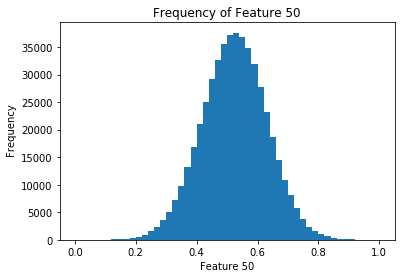

In [28]:
#needs more graphs i guess 

#feature50 plot for no real reason
f50 = train.loc[:,'feature50']

plt.clf()
plt.ylabel(' Frequency')
plt.xlabel('Feature 50')
plt.title('Frequency of Feature 50')
plt.hist(f50, bins=50, range= (0,1))
plt.savefig('1.0-ag-feature50.png')

<Figure size 432x288 with 0 Axes>

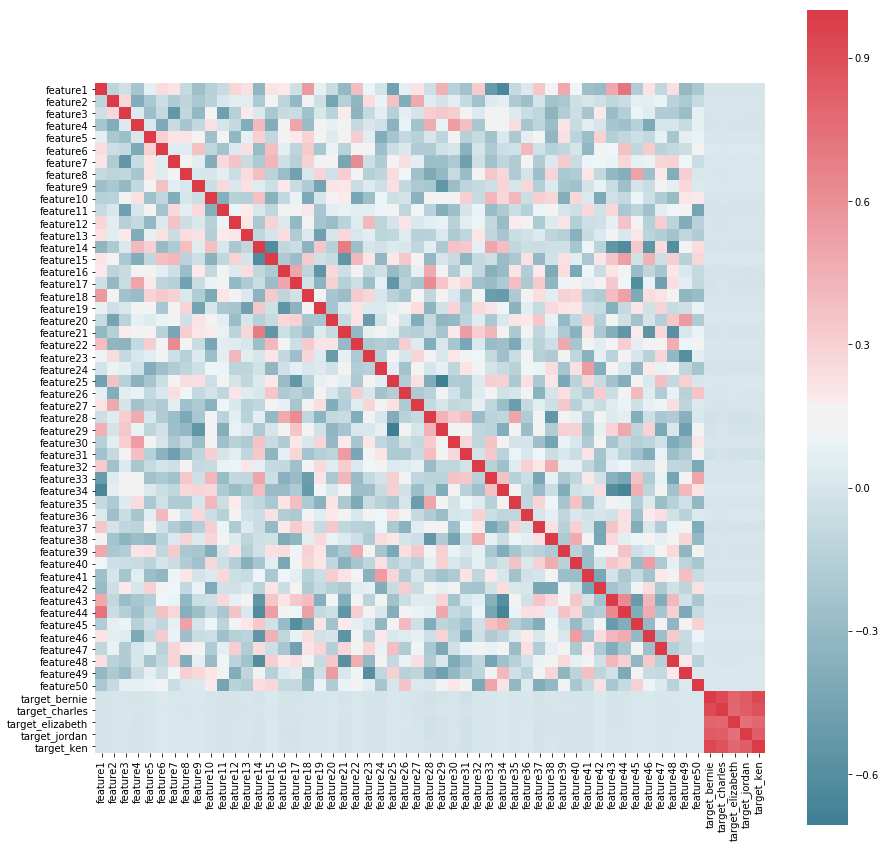

In [29]:
# some sort of correlation matrix also for no real reason... 
plt.clf()
f, ax = plt.subplots(figsize=(15, 15))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
plt.savefig('1.0-ag-Correlation Matrix.png')


Model NOTES

- few useless cols, order should be maintained the whole way if they want them back for w/e reason
- CV splits by Era.. worth looking at
- some non PCA based thing maybe?
- a good way to do multi-classification
- NN would be fun i think 
- no imbalance
- praise the CAC 

Presentation Notes
-A graph would be really nice of historical pricing for NMR,
-NMR -> Nuclear Magnetic Resonance (MRI), idk some bad joke

